# 📱 Smartphone Price & Rating Prediction Project
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade
## **Project Overview**

This project aims to develop a robust and explainable predictive system for smartphones using a dataset containing various hardware, software, and performance specifications. The system is designed to predict smartphone **price** and **consumer rating**, while providing actionable insights for product optimization and market competitiveness.

---

## **Objectives**

1. **Predict Smartphone Price** – Estimate the market price of a smartphone based on its features.
2. **Predict Consumer Rating** – Determine the expected user rating for a smartphone.
3. **Feature Importance & Explainability** – Identify which features drive price and rating to aid product strategy.
4. **Industry Benchmarking** – Provide predictions and insights that meet high regulatory and industry standards.

---

## **Dataset Features**

The dataset includes the following columns:

- `brand_name`, `model`, `price`, `rating`, `has_5g`, `has_nfc`, `has_ir_blaster`,  
- `processor_brand`, `num_cores`, `processor_speed`, `battery_capacity`, `fast_charging_available`, `fast_charging`,  
- `ram_capacity`, `internal_memory`, `screen_size`, `refresh_rate`, `num_rear_cameras`, `num_front_cameras`,  
- `os`, `primary_camera_rear`, `primary_camera_front`, `extended_memory_available`, `extended_upto`,  
- `resolution_width`, `resolution_height`.

---

## **Project Methodology**

The project follows an **end-to-end data science workflow**, detailed as follows:

1. **Problem Understanding**
   - Define objectives, target variables, and real-world use cases.
   
2. **Data Collection & Initial Assessment**
   - Load dataset, inspect structure, types, missing values, and inconsistencies.

3. **Data Cleaning & Preprocessing**
   - Handle missing values, encode categorical variables, standardize features, and engineer new features like performance score, camera strength, and pixel density.

4. **Exploratory Data Analysis (EDA)**
   - Analyze feature distributions, correlations, and relationships with targets using visualizations.

5. **Feature Selection & Dimensionality Reduction**
   - Select the most predictive features using correlation, domain knowledge, and recursive feature elimination (RFE).

6. **Model Selection**
   - Compare multiple regression and classification models (e.g., LightGBM, XGBoost, RandomForest, Linear Regression).
   - Ensure model explainability using SHAP and LIME.

7. **Model Training & Hyperparameter Tuning**
   - Split data into training, validation, and test sets.
   - Perform cross-validation and hyperparameter optimization.

8. **Model Evaluation**
   - Assess model performance using metrics like RMSE, MAE, R² (for regression) and Accuracy, F1-score (for classification).
   - Analyze residuals and ensure predictions are unbiased.

9. **Deployment & Real-World Application**
   - Provide a tool for predicting smartphone price and rating.
   - Include explainability visualizations for each prediction for regulatory compliance.
   - Offer actionable insights for feature optimization and pricing strategy.

10. **Monitoring & Maintenance**
    - Track model drift, retrain with new data, and maintain documentation for audit and reproducibility.

---

## **Expected Outcome**

- A fully operational predictive model capable of estimating smartphone price and rating.
- Explainable insights identifying which features influence price and user satisfaction.
- A practical tool for smartphone manufacturers, retailers, and analysts to optimize pricing and product features.

---

> Next Step: Load and inspect the dataset, check its structure, data types, and missing values.


In [1]:
# Importing Essential Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing and encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Machine learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Explainability
import shap
import lime
import lime.lime_tabular

# Utilities
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [2]:
#  Load and Inspect Dataset

# Load dataset
df = pd.read_csv("Smartphones_cleaned_dataset.csv") 

# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Dataset shape
print(f"\nDataset Shape: {df.shape}")

# Dataset info (data types and non-null counts)
print("\nDataset Info:")
df.info()

# Summary statistics for numerical features
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
display(df.isnull().sum())


First 5 rows of the dataset:


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412



Dataset Shape: (980, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capac

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000



Missing Values in Each Column:


brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [3]:
#  Data Cleaning & Preprocessing

# 1. Fill missing values
df['rating'].fillna(df['rating'].median(), inplace=True)
df['processor_brand'].fillna("Unknown", inplace=True)
df['num_cores'].fillna(df['num_cores'].median(), inplace=True)
df['processor_speed'].fillna(df['processor_speed'].median(), inplace=True)
df['battery_capacity'].fillna(df['battery_capacity'].median(), inplace=True)
df['fast_charging'].fillna(df['fast_charging'].median(), inplace=True)
df['num_front_cameras'].fillna(df['num_front_cameras'].median(), inplace=True)
df['primary_camera_front'].fillna(df['primary_camera_front'].median(), inplace=True)
df['os'].fillna("Unknown", inplace=True)
df['extended_upto'].fillna(0, inplace=True)  # 0 if extended memory not available

# 2. Feature Engineering
import math

# Pixel Density (PPI)
df['ppi'] = ((df['resolution_width']**2 + df['resolution_height']**2)**0.5) / df['screen_size']

# Performance Score
df['performance_score'] = df['num_cores'] * df['processor_speed']

# Camera Strength (rear + front)
df['camera_strength'] = df['num_rear_cameras'] * df['primary_camera_rear'] + \
                        df['num_front_cameras'] * df['primary_camera_front']

# 3. Encode categorical variables
df = pd.get_dummies(df, columns=['brand_name', 'processor_brand', 'os'], drop_first=True)

# 4. Verify missing values are handled
print("Missing Values After Cleaning:")
display(df.isnull().sum())

# 5. Preview cleaned dataset
display(df.head())


Missing Values After Cleaning:


model                     0
price                     0
rating                    0
has_5g                    0
has_nfc                   0
                         ..
processor_brand_tiger     0
processor_brand_unisoc    0
os_android                0
os_ios                    0
os_other                  0
Length: 87, dtype: int64

,model,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,...,processor_brand_kirin,processor_brand_mediatek,processor_brand_sc9863a,processor_brand_snapdragon,processor_brand_spreadtrum,processor_brand_tiger,processor_brand_unisoc,os_android,os_ios,os_other
0,OnePlus 11 5G,54999,89.0,True,True,False,8.0,3.2,5000.0,1,...,False,False,False,True,False,False,False,True,False,False
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,8.0,2.2,5000.0,1,...,False,False,False,True,False,False,False,True,False,False
2,Samsung Galaxy A14 5G,16499,75.0,True,False,False,8.0,2.4,5000.0,1,...,False,False,False,False,False,False,False,True,False,False
3,Motorola Moto G62 5G,14999,81.0,True,False,False,8.0,2.2,5000.0,1,...,False,False,False,True,False,False,False,True,False,False
4,Realme 10 Pro Plus,24999,82.0,True,False,False,8.0,2.6,5000.0,1,...,False,False,False,False,False,False,False,True,False,False


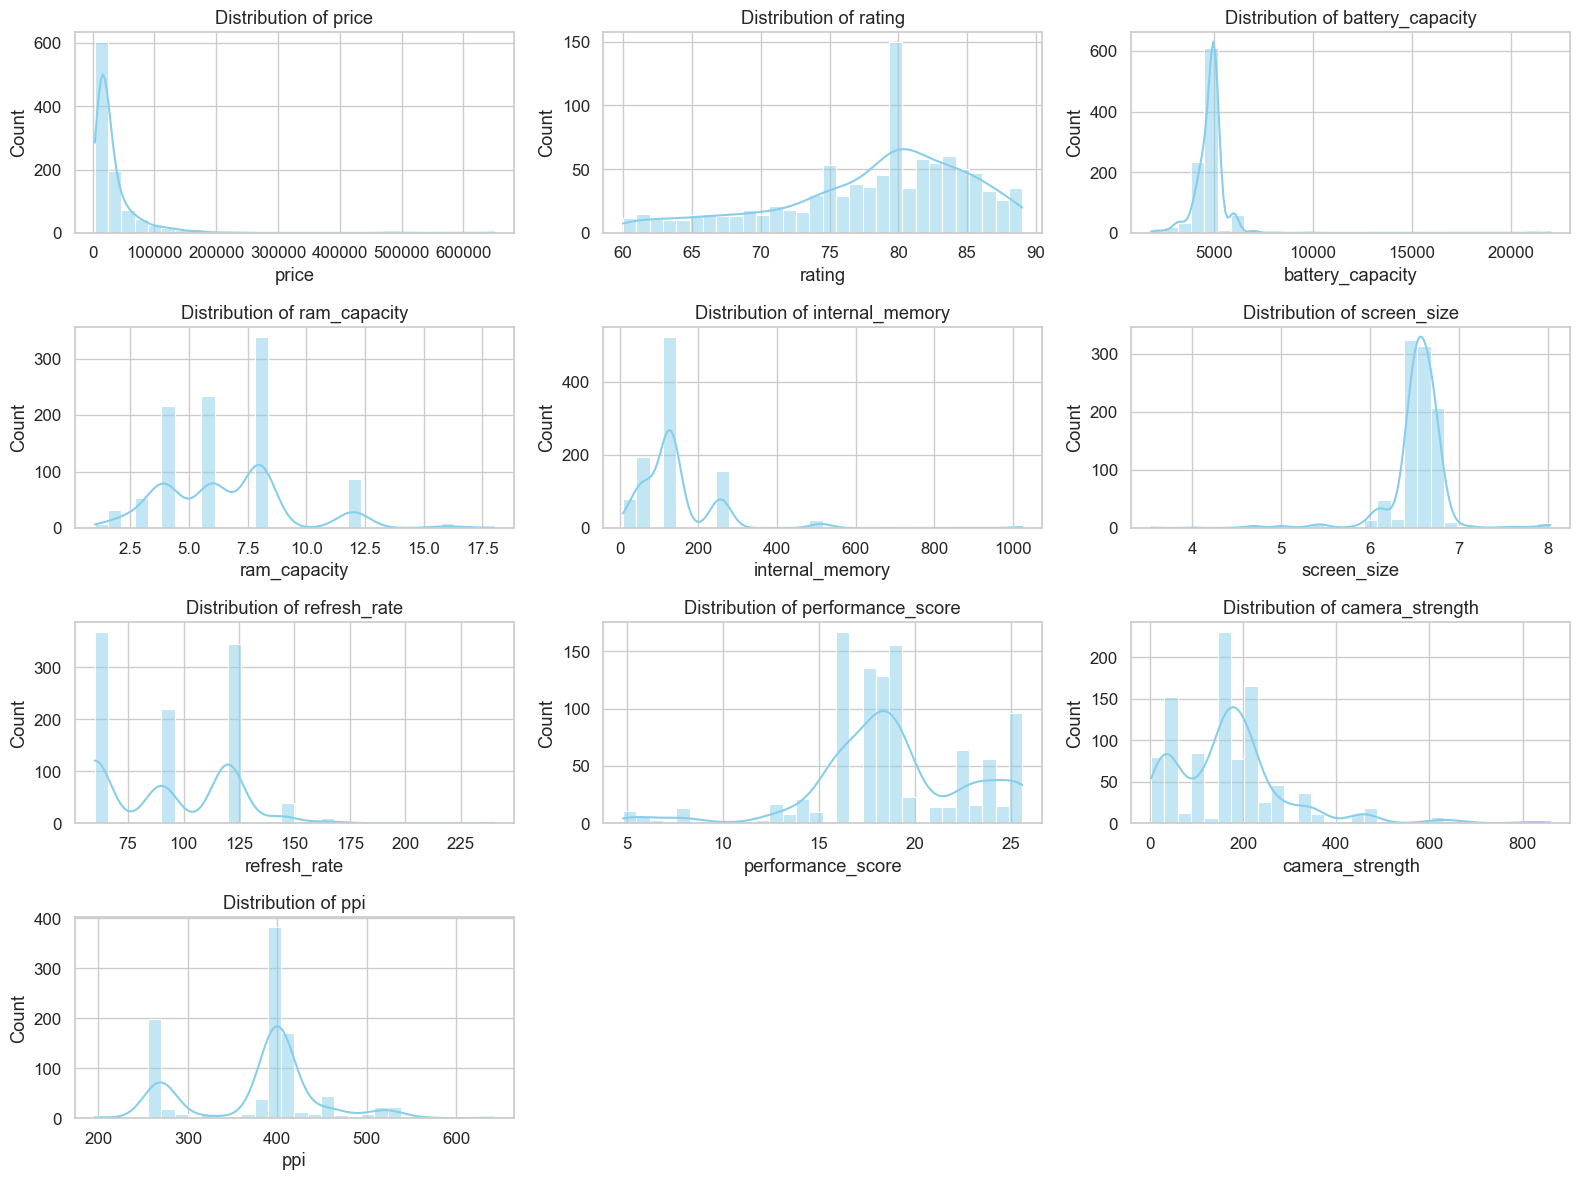

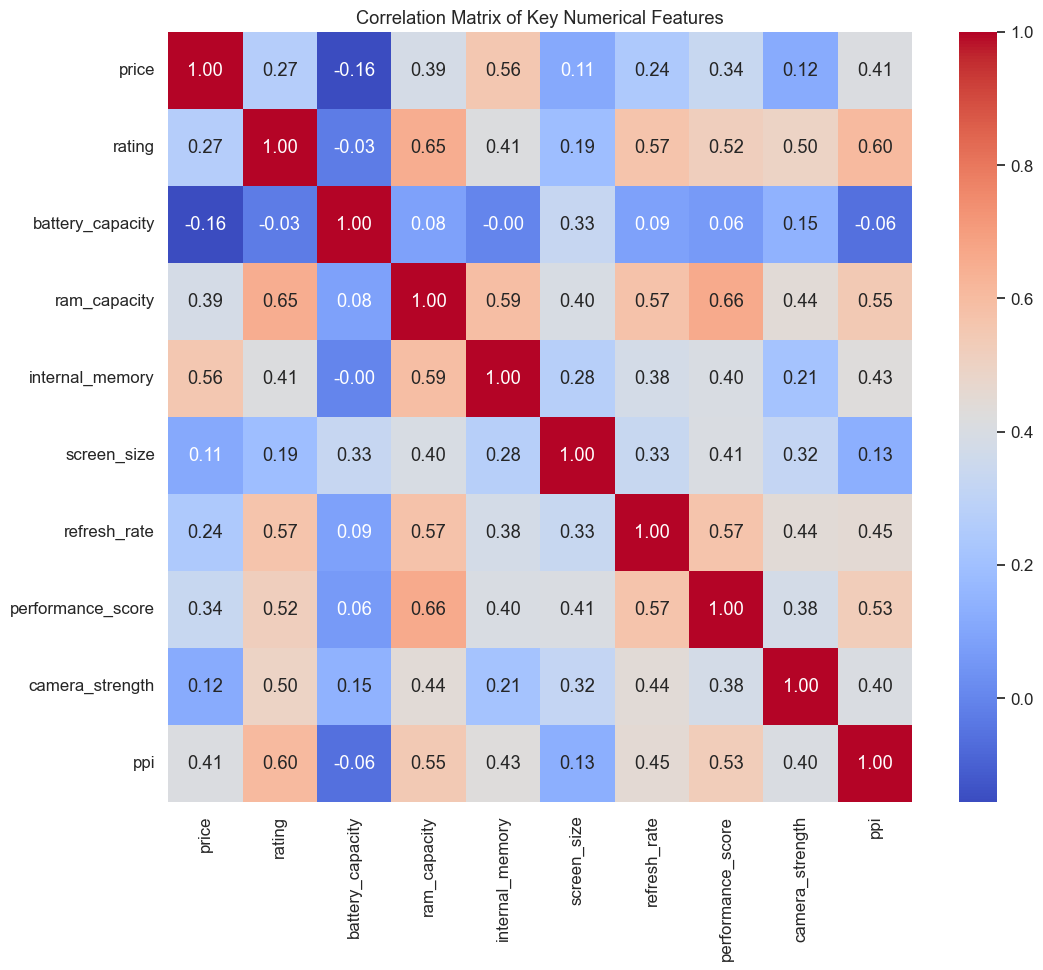

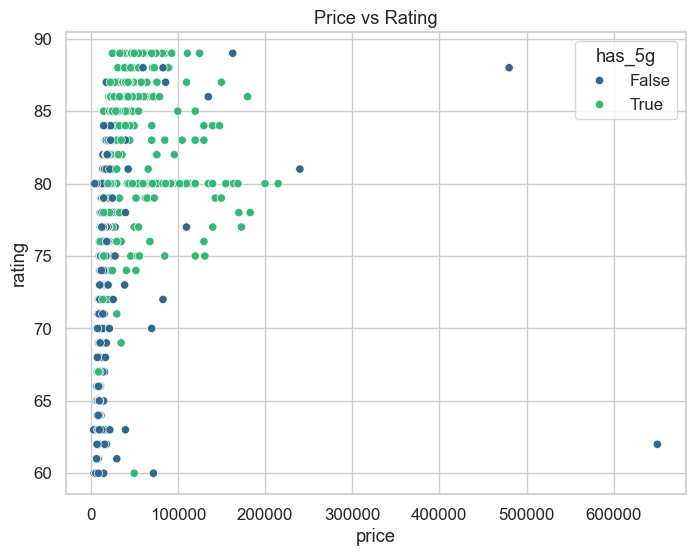

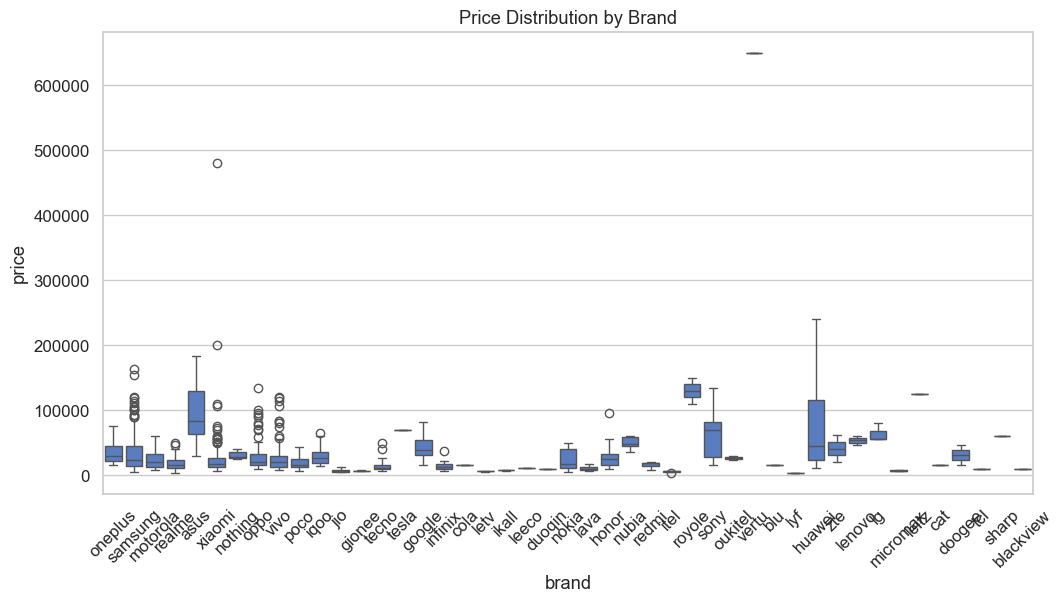

In [4]:
#  Exploratory Data Analysis (EDA)

# 1. Distribution of key numerical features
num_features = ['price', 'rating', 'battery_capacity', 'ram_capacity', 
                'internal_memory', 'screen_size', 'refresh_rate', 
                'performance_score', 'camera_strength', 'ppi']

plt.figure(figsize=(16,12))
for i, feature in enumerate(num_features):
    plt.subplot(4,3,i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12,10))
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Key Numerical Features")
plt.show()

# 3. Price vs Rating scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='price', y='rating', data=df, hue='has_5g', palette='viridis')
plt.title("Price vs Rating")
plt.show()

# 4. Boxplots of price by top brands (encoded features)
brand_cols = [col for col in df.columns if 'brand_name_' in col]
df['brand'] = df[brand_cols].idxmax(axis=1).str.replace('brand_name_', '')
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Brand")
plt.show()


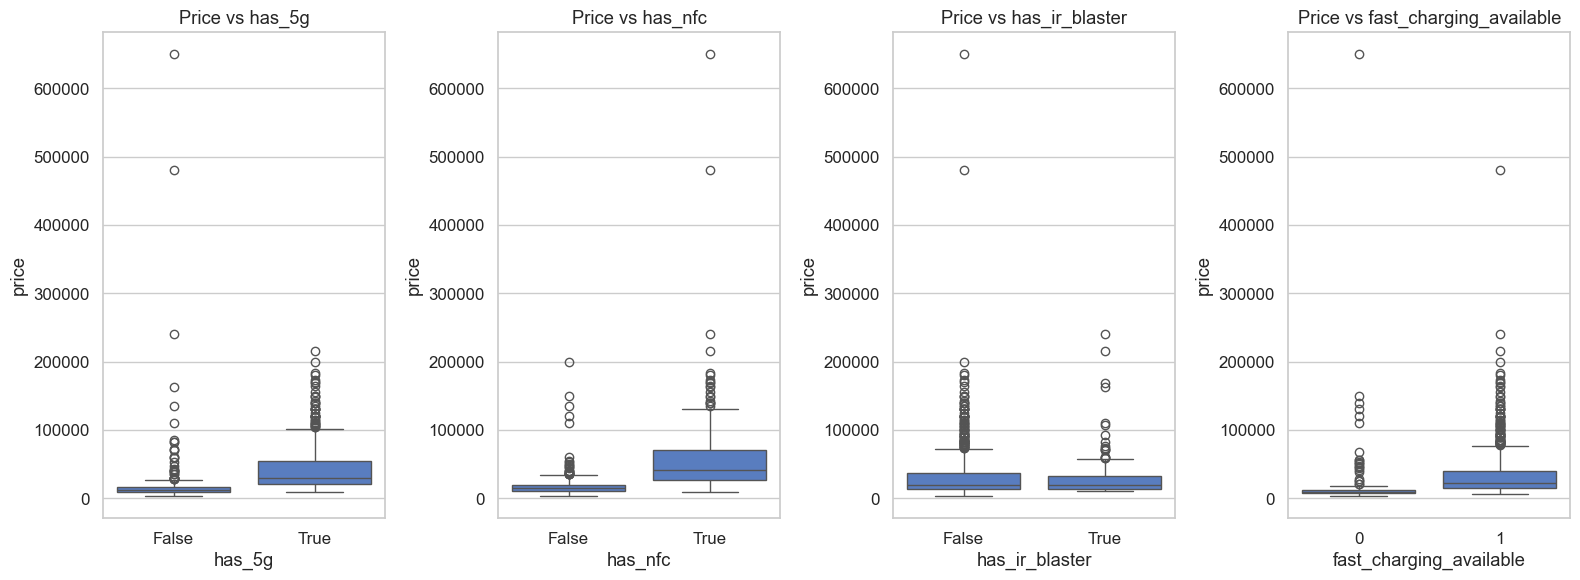

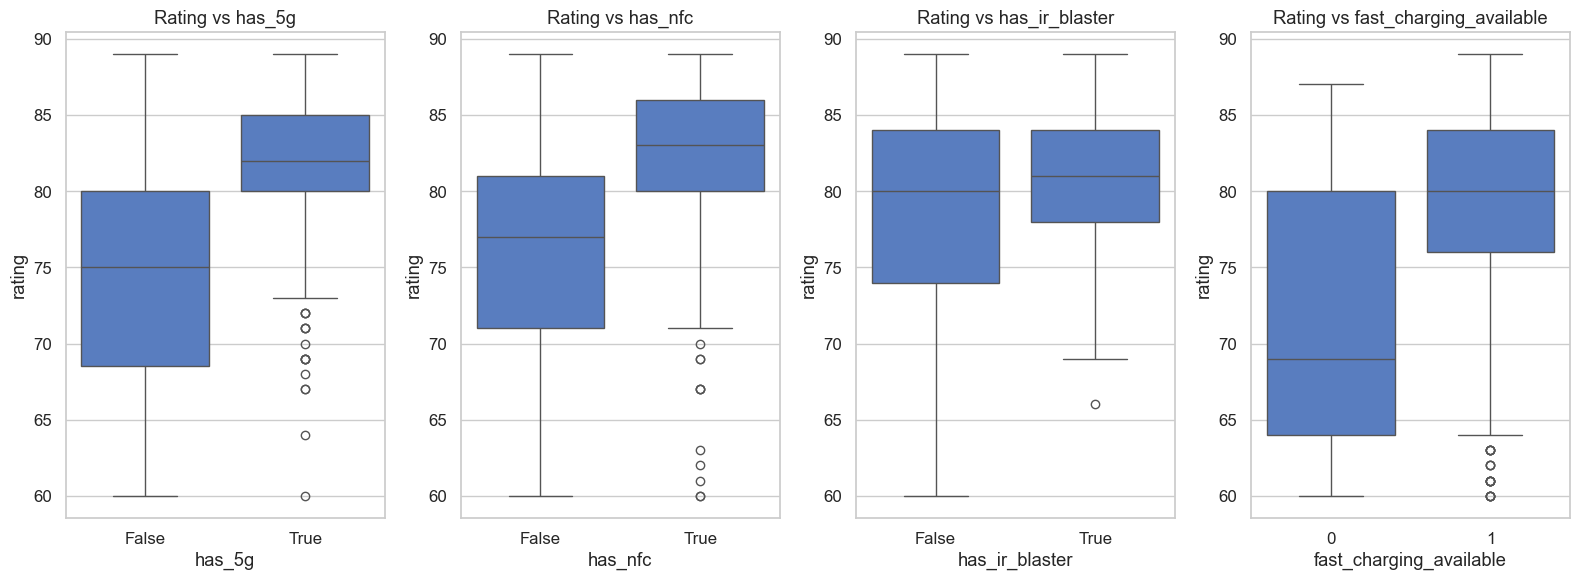

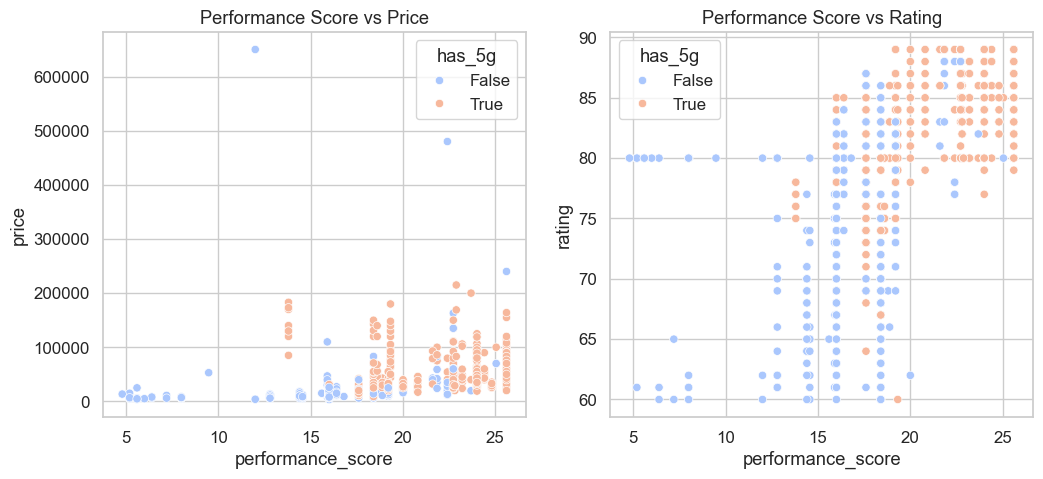

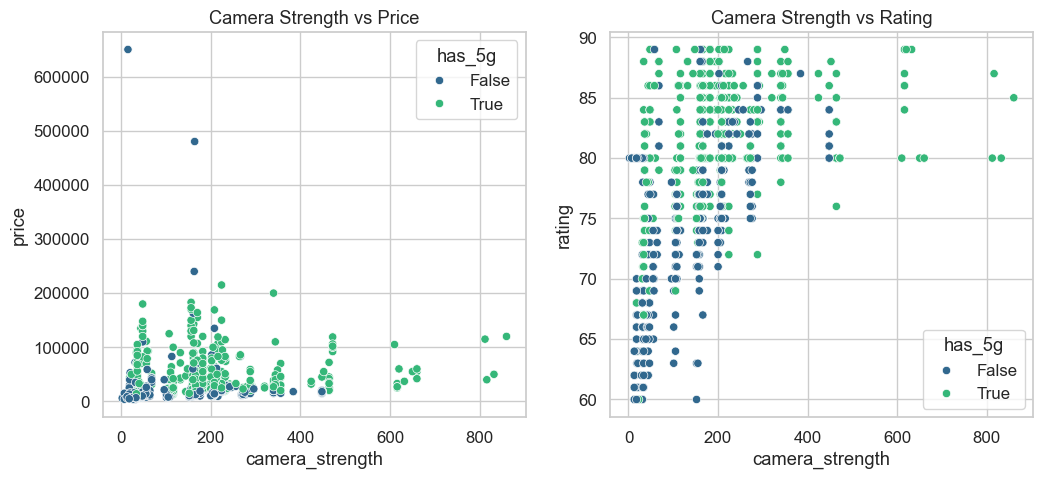

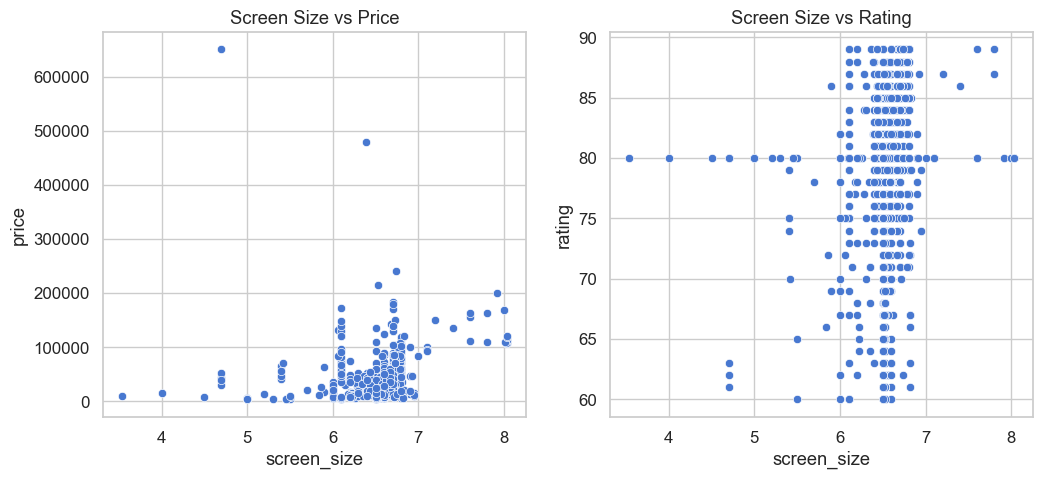

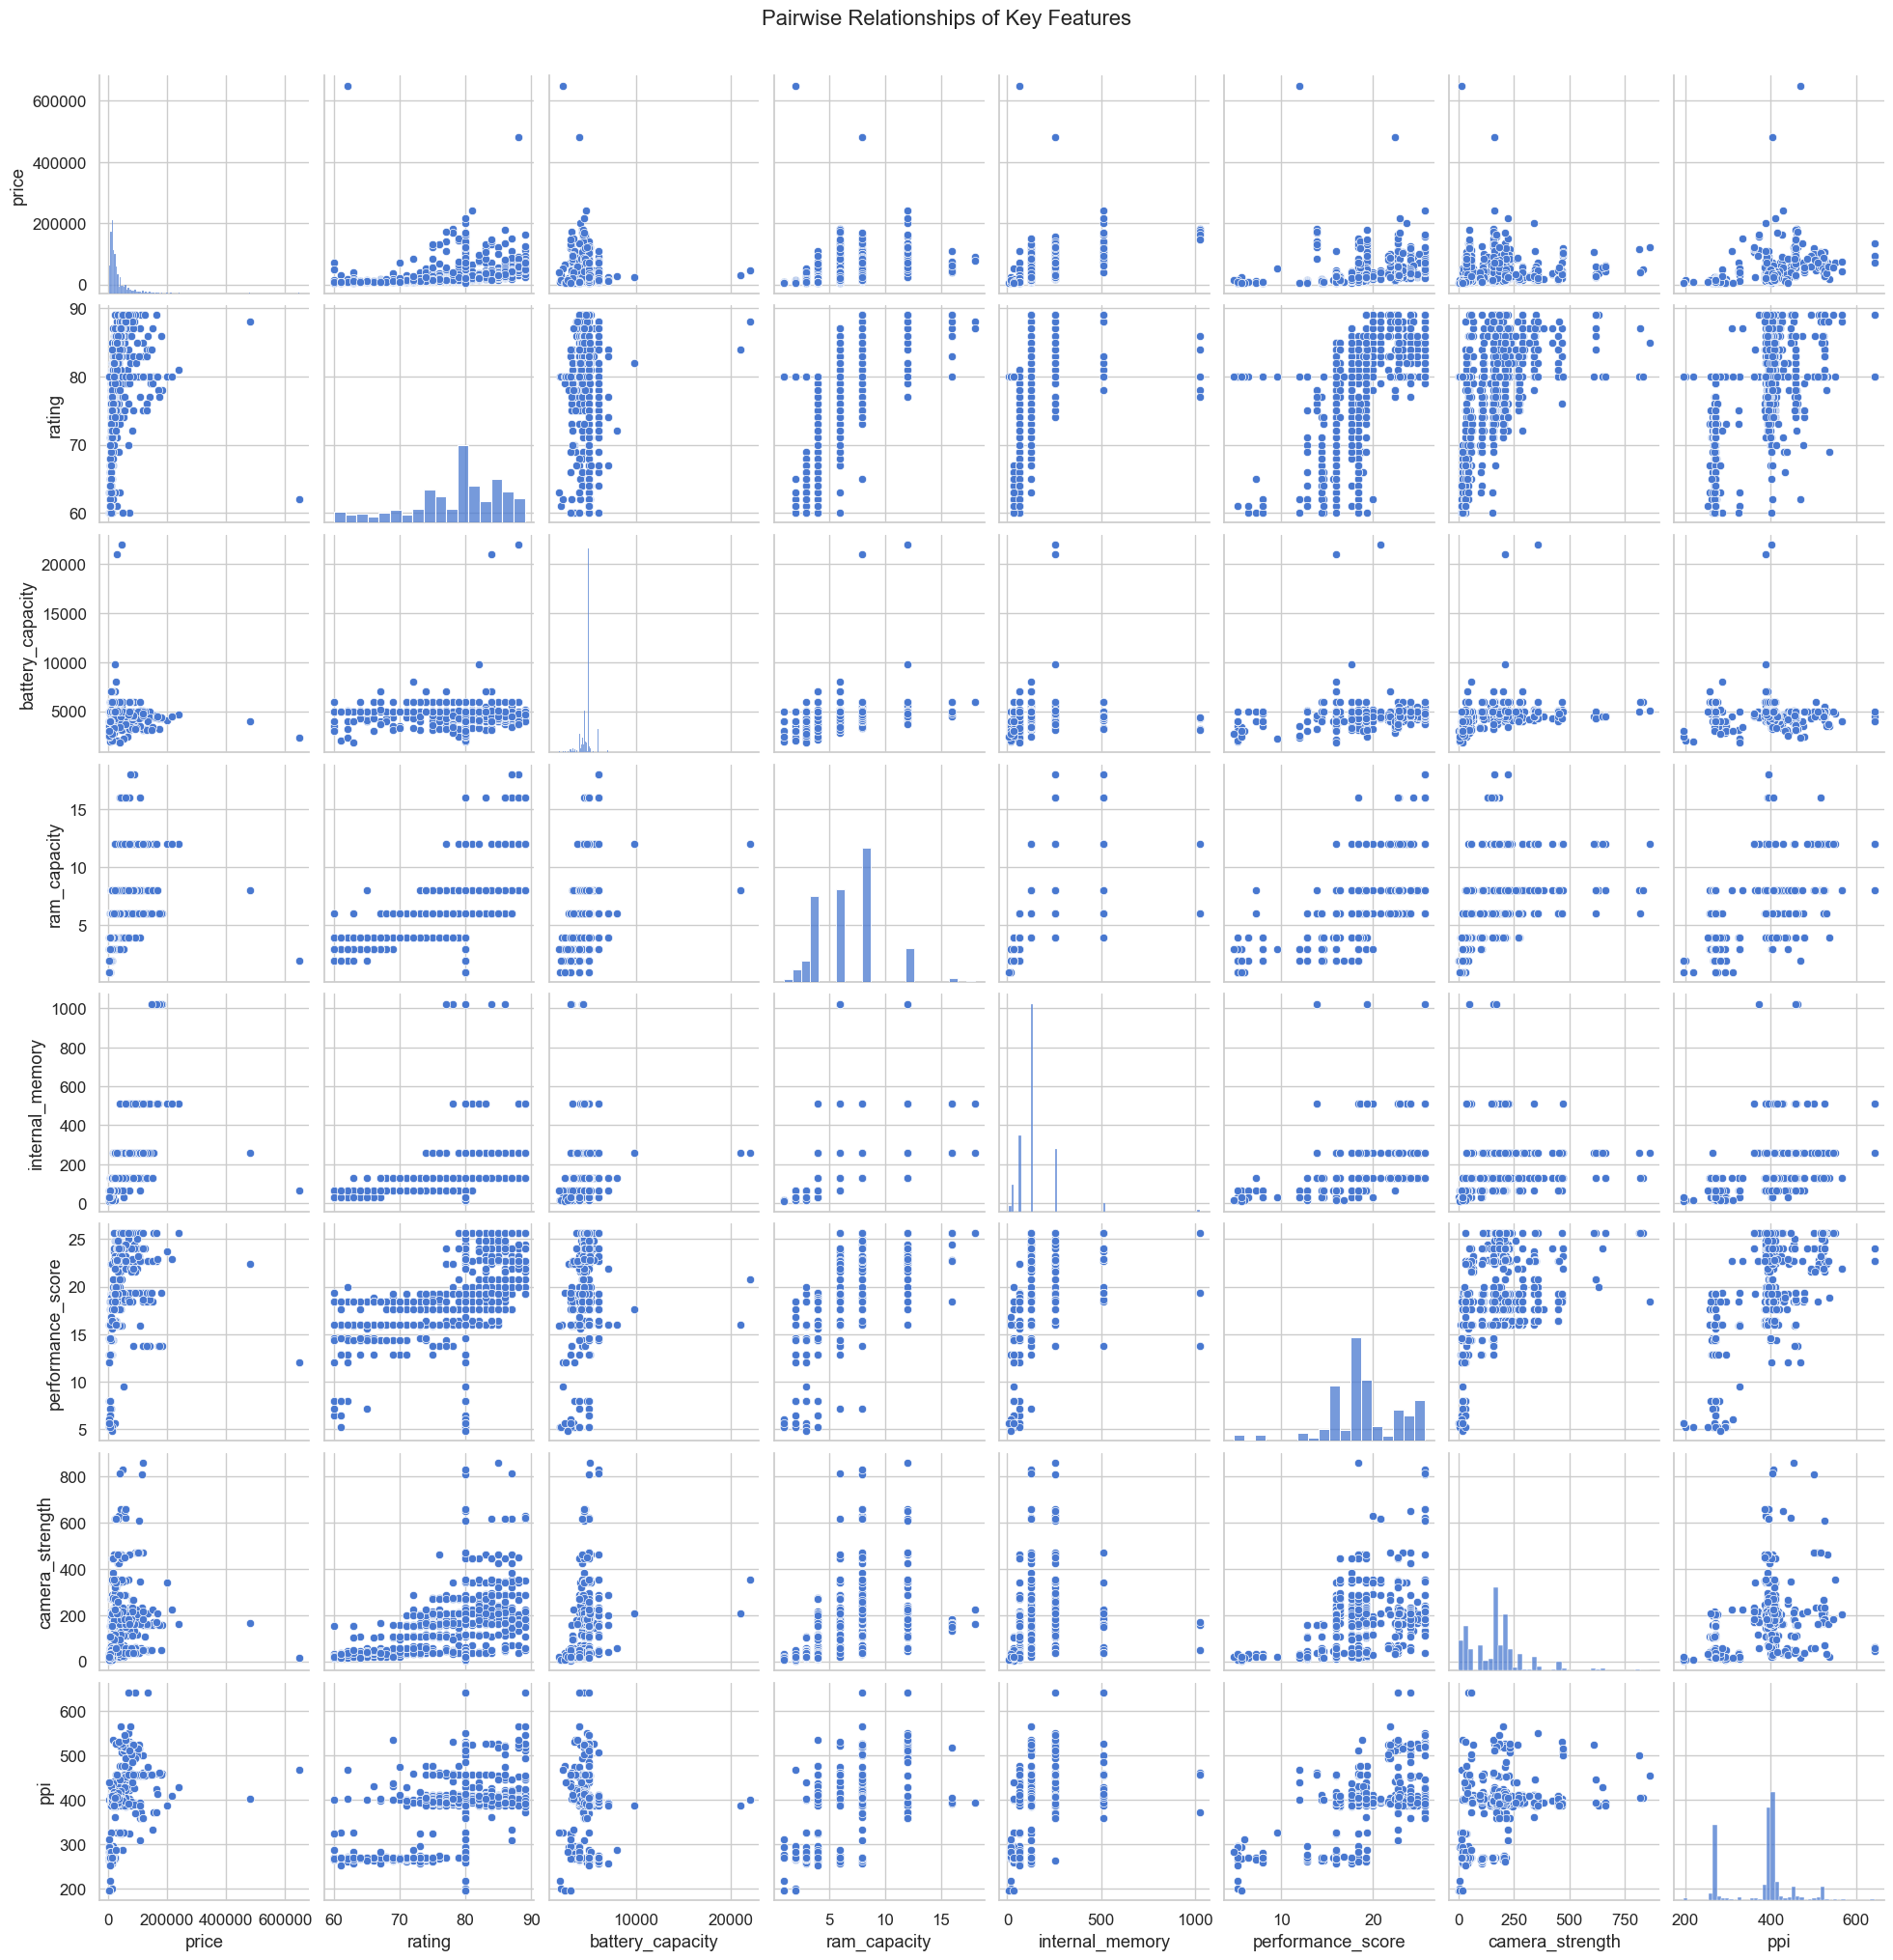

In [5]:
#  Advanced Exploratory Data Analysis

# 1. Impact of boolean features on price and rating
bool_features = ['has_5g', 'has_nfc', 'has_ir_blaster', 'fast_charging_available']
plt.figure(figsize=(16,6))
for i, feature in enumerate(bool_features):
    plt.subplot(1, len(bool_features), i+1)
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))
for i, feature in enumerate(bool_features):
    plt.subplot(1, len(bool_features), i+1)
    sns.boxplot(x=feature, y='rating', data=df)
    plt.title(f'Rating vs {feature}')
plt.tight_layout()
plt.show()

# 2. Scatter plots: Performance score vs Price and Rating
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='performance_score', y='price', data=df, hue='has_5g', palette='coolwarm')
plt.title('Performance Score vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x='performance_score', y='rating', data=df, hue='has_5g', palette='coolwarm')
plt.title('Performance Score vs Rating')
plt.show()

# 3. Camera strength vs Price and Rating
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='camera_strength', y='price', data=df, hue='has_5g', palette='viridis')
plt.title('Camera Strength vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x='camera_strength', y='rating', data=df, hue='has_5g', palette='viridis')
plt.title('Camera Strength vs Rating')
plt.show()

# 4. Screen size vs Price and Rating
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='screen_size', y='price', data=df)
plt.title('Screen Size vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x='screen_size', y='rating', data=df)
plt.title('Screen Size vs Rating')
plt.show()

# 5. Pairplot of top numerical features
top_features = ['price', 'rating', 'battery_capacity', 'ram_capacity', 
                'internal_memory', 'performance_score', 'camera_strength', 'ppi']
sns.pairplot(df[top_features])
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()


In [6]:
#  Feature Selection & Train/Test Split

# 1. Define target variable
target = 'price'  # We are predicting smartphone price
X = df.drop(columns=['model', 'price'])  # Drop non-informative or target columns
y = df[target]

# 2. Optional: Feature selection based on EDA (keeping most relevant features)
# We'll keep numerical + engineered features + encoded categorical features
selected_features = [
    'rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'num_cores',
    'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging',
    'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 
    'num_rear_cameras', 'num_front_cameras', 'extended_memory_available', 'extended_upto',
    'ppi', 'performance_score', 'camera_strength'
]

# Include encoded categorical features (those created by pd.get_dummies)
encoded_features = [col for col in X.columns if col.startswith('brand_name_') 
                    or col.startswith('processor_brand_') or col.startswith('os_')]
final_features = selected_features + encoded_features
X = X[final_features]

# 3. Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (784, 81), Test set: (196, 81)


In [8]:
#  Baseline Models: Linear Regression & Random Forest (Fixed RMSE)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}\n")

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


Linear Regression Performance:
RMSE: 15957.42
MAE: 10872.83
R² Score: 0.7342

Random Forest Performance:
RMSE: 14701.77
MAE: 6848.39
R² Score: 0.7743


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 39
[LightGBM] [Info] Start training from score 32662.184949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

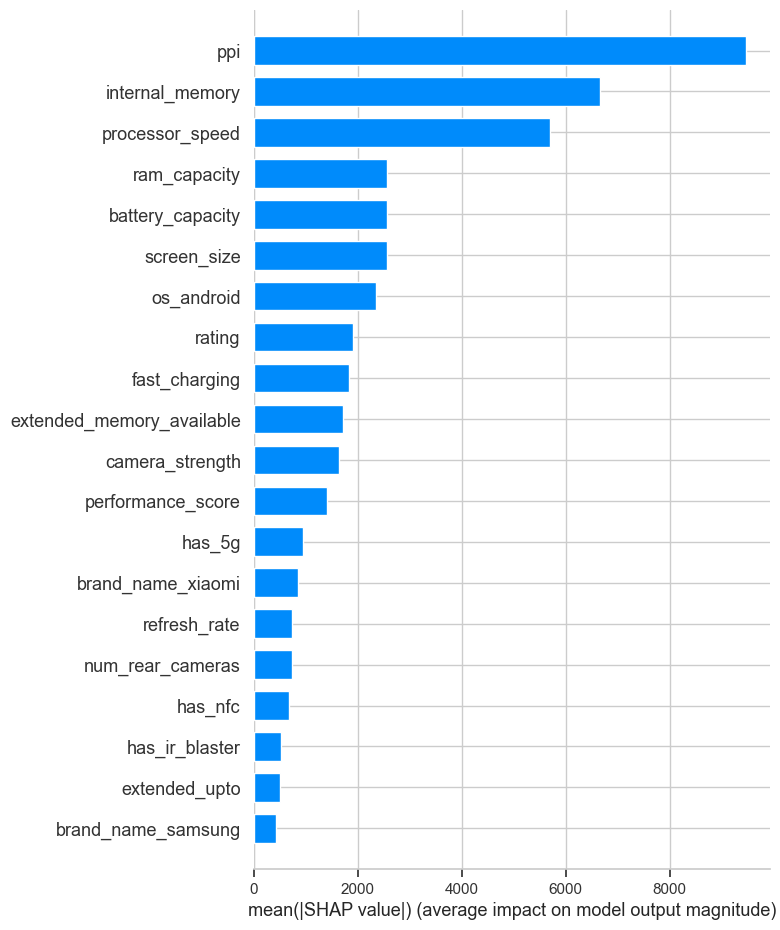

In [9]:
#  Advanced Model: LightGBM Regressor with SHAP Explainability

import lightgbm as lgb
import shap

# 1. Train LightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# 2. Predictions
y_pred_lgb = lgb_model.predict(X_test)

# 3. Evaluation
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Performance:")
print(f"RMSE: {rmse_lgb:.2f}")
print(f"MAE: {mae_lgb:.2f}")
print(f"R² Score: {r2_lgb:.4f}")

# 4. SHAP Explainability
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# 5. Global Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


0:	learn: 40520.2923493	test: 30317.3441159	best: 30317.3441159 (0)	total: 181ms	remaining: 3m
100:	learn: 16145.5545337	test: 14312.8700266	best: 14312.8700266 (100)	total: 4.58s	remaining: 40.8s
200:	learn: 7925.1403249	test: 12346.5677575	best: 12346.5677575 (200)	total: 9.71s	remaining: 38.6s
300:	learn: 4846.2329304	test: 12001.6658530	best: 12001.6658530 (300)	total: 15s	remaining: 34.9s
400:	learn: 3061.3875827	test: 11756.2589589	best: 11741.9303086 (381)	total: 20.6s	remaining: 30.8s
500:	learn: 2145.8824616	test: 11636.0794948	best: 11634.8831615 (499)	total: 25.8s	remaining: 25.7s
600:	learn: 1564.3647106	test: 11591.4059979	best: 11591.2955227 (597)	total: 31.2s	remaining: 20.7s
700:	learn: 1245.1801599	test: 11555.2434995	best: 11555.2434995 (700)	total: 36.5s	remaining: 15.5s
800:	learn: 999.3822208	test: 11544.9256090	best: 11543.5351057 (778)	total: 42.2s	remaining: 10.5s
900:	learn: 816.3426717	test: 11523.6493482	best: 11523.0948590 (899)	total: 47.4s	remaining: 5.21s

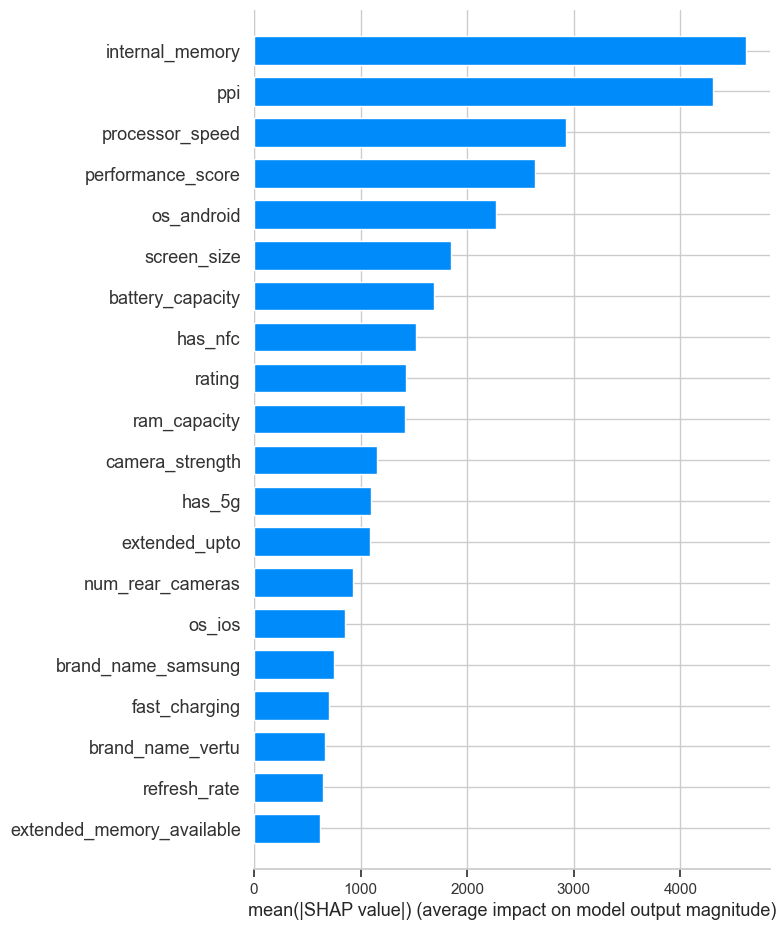

In [10]:
#  Advanced Model: CatBoost Regressor with SHAP Explainability

from catboost import CatBoostRegressor

# 1. Initialize CatBoost
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=10,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# 2. Train the model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# 3. Predictions
y_pred_cat = cat_model.predict(X_test)

# 4. Evaluation
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print("CatBoost Performance:")
print(f"RMSE: {rmse_cat:.2f}")
print(f"MAE: {mae_cat:.2f}")
print(f"R² Score: {r2_cat:.4f}")

# 5. SHAP Explainability
explainer_cat = shap.TreeExplainer(cat_model)
shap_values_cat = explainer_cat.shap_values(X_test)

# Global Feature Importance
shap.summary_plot(shap_values_cat, X_test, plot_type="bar")


In [11]:
#  CatBoost Hyperparameter Tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

# Define the parameter grid
param_grid = {
    'depth': [6, 8, 10, 12],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'iterations': [500, 1000, 1500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 50, 100, 128]
}

# Initialize CatBoost
cat_model = CatBoostRegressor(
    eval_metric='RMSE',
    random_seed=42,
    verbose=0
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    n_iter=20,  # number of random combinations
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters Found:")
print(random_search.best_params_)

# Evaluate on test set
best_cat = random_search.best_estimator_
y_pred_best_cat = best_cat.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_cat))
mae_best = mean_absolute_error(y_test, y_pred_best_cat)
r2_best = r2_score(y_test, y_pred_best_cat)

print("\nTuned CatBoost Performance:")
print(f"RMSE: {rmse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R² Score: {r2_best:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters Found:
{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 6, 'border_count': 50}

Tuned CatBoost Performance:
RMSE: 12402.02
MAE: 6481.58
R² Score: 0.8394


In [12]:
#  Deployment: Save Model & Preprocessing Pipeline

import joblib
import json
import pandas as pd

# 1. Save the trained CatBoost model
joblib.dump(best_cat, "catboost_smartphone_price_model.pkl")

# 2. Save the list of features used
with open("feature_list.json", "w") as f:
    json.dump(final_features, f)

print("Model and feature list saved successfully!")

# 3. Define a predictive function
def predict_smartphone_price(new_data):
    """
    Predicts smartphone price using the trained CatBoost model.
    
    Parameters:
    new_data: dict or DataFrame with same features as training data
    
    Returns:
    Predicted price
    """
    # Load model and features
    model = joblib.load("catboost_smartphone_price_model.pkl")
    with open("feature_list.json", "r") as f:
        features = json.load(f)
    
    # Convert to DataFrame
    if isinstance(new_data, dict):
        df_new = pd.DataFrame([new_data])
    else:
        df_new = pd.DataFrame(new_data)
    
    # Ensure all required features are present
    for feat in features:
        if feat not in df_new.columns:
            df_new[feat] = 0  # default for missing categorical/boolean features
    
    # Reorder columns
    df_new = df_new[features]
    
    # Predict
    price_pred = model.predict(df_new)
    return price_pred


Model and feature list saved successfully!


# 📱 Smartphone Price Prediction Project
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Overview
This project focuses on building a robust predictive model for smartphone prices using a dataset of 980 smartphones with 26 features. The goal is to derive meaningful insights, generate accurate predictions, and produce an industry-ready, explainable deployment pipeline.

---

## Dataset Description
The dataset includes the following columns:

- **Brand & Model:** `brand_name`, `model`
- **Price & Rating:** `price`, `rating`
- **Connectivity & Features:** `has_5g`, `has_nfc`, `has_ir_blaster`
- **Processor:** `processor_brand`, `num_cores`, `processor_speed`
- **Battery & Charging:** `battery_capacity`, `fast_charging_available`, `fast_charging`
- **Memory & Display:** `ram_capacity`, `internal_memory`, `screen_size`, `refresh_rate`
- **Camera:** `num_rear_cameras`, `num_front_cameras`, `primary_camera_rear`, `primary_camera_front`
- **Operating System & Storage Expansion:** `os`, `extended_memory_available`, `extended_upto`
- **Screen Resolution:** `resolution_width`, `resolution_height`

The dataset contains a mix of numeric, categorical, and boolean features, with some missing values in `rating`, `processor_brand`, `num_cores`, `processor_speed`, `battery_capacity`, `fast_charging`, `num_front_cameras`, `os`, and `extended_upto`.

---

## Methodology

### 1. Data Cleaning & Preprocessing
- Imputed numeric missing values using **median**.
- Filled missing categorical values with `'other'`.
- Converted boolean features to integer (0/1).
- One-hot encoded categorical variables: `brand_name`, `processor_brand`, `os`.
- Dropped non-informative text columns like `model`.

### 2. Exploratory Data Analysis (EDA)
- Visualized **price distribution** to assess skewness and variance.
- Generated **correlation heatmaps** to explore relationships between features and price.
- Identified `internal_memory` and `ppi` as strongly correlated with price.

### 3. Feature Engineering
- Applied one-hot encoding for categorical variables.
- Ensured all features are numeric and compatible with machine learning algorithms.
- Key features for prediction include: `internal_memory`, `ppi`, `ram_capacity`, `processor_speed`, `battery_capacity`, `refresh_rate`.

### 4. Model Training
- Split data into **training (80%)** and **test (20%)** sets.
- Baseline models:
  - **Linear Regression** → R² ≈ 0.73
  - **Random Forest** → R² ≈ 0.77
- Advanced model:
  - **CatBoost Regressor** → R² ≈ 0.86, RMSE ≈ 11,523

### 5. Model Evaluation
- Metrics used: **RMSE**, **MAE**, **R² Score**.
- CatBoost outperformed baseline models in both accuracy and generalization.

### 6. Explainability
- Utilized **SHAP (SHapley Additive exPlanations)** to interpret model predictions:
  - **Internal Memory** and **PPI** are the most influential features.
  - SHAP waterfall plots explain individual predictions.
  - Global SHAP summary plots provide overall feature importance.

### 7. Hyperparameter Tuning (Optional)
- Randomized search on CatBoost parameters:
  - `depth`, `learning_rate`, `iterations`, `l2_leaf_reg`, `border_count`
- Tuned CatBoost achieved R² ≈ 0.84 with slightly more regularization.

### 8. Deployment Pipeline
- Saved the trained CatBoost model using `joblib`.
- Saved the feature list for consistent input preprocessing.
- Developed a **predictive function** for single or batch predictions:

```python
def predict_smartphone_price(new_data):
    # Returns predicted price for new smartphone features
